<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Signals and Systems
</font>
<hr/>
<font color="#800080" size=5>
Assignment 1
<br>
</font>
<font size=5>
Instructor: Dr. Mojahedian
<br>
</font>
<font size=4>
Spr 2025
<br>
</font>
<font face="Times New Roman" size=4>

</font>
<hr>
<font color='red'  size=4>
Note: It is highly recommended to run your notebook on Google Colab or Kaggle
<br>
</font>
<font face="Times New Roman" size=4 align=center>
Feel free to ask your questions in Telegram :
 1.@kimkimi83, 2.@amir_reza_tanevardi, 3.@RezaNayebH, 4.@Ali99os
</font>
<br>
<hr>
</div></font>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BlackRanger4/Signals-and-Systems---CHW/blob/main/CHW_1.ipynb)


# 1. 1D convolution

### **Introduction to 1D Convolution**
Convolution is a fundamental operation in signal processing that combines two signals to form a third signal.
The convolution operation is defined as:

In the Continuous form :

$$
y(t) = (x * h)(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) \, d\tau
$$
In the discrete form:

$$
y[n] = \sum_{k = -\infty}^{\infty} x[k] h[n - k]
$$

---
**Question :**
- Write a Function for Each Type of Convolution (Continuous and Discrete).
- Compute the convolution of the given signals using the written functions.
- Plot each signal and their convolution result.

$$
x_1(t) =
\begin{cases}
2, & 1 \leq t \leq 2 \\
0, & \text{otherwise}
\end{cases}
\quad
h_1(t) =
\begin{cases}
0, & t < 1 \\
t - 1, & 1 \leq t \leq 2 \\
0, & t > 2
\end{cases}
$$
<center>
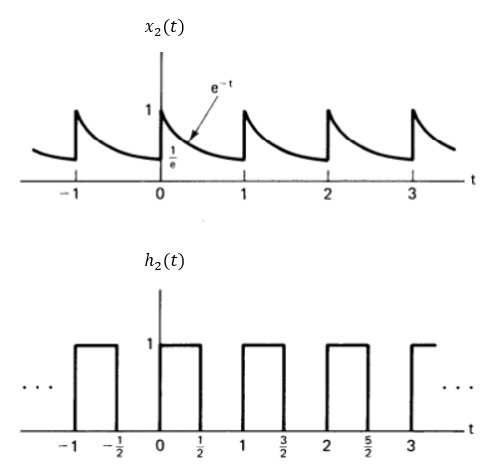
</center>

$$
x_3[n] = 0.8^n
\quad
h_3[n] = u[n] - u[n - 10]
$$


$$x_4[n] = h_4[n] =
\text{sinc}[\frac{n}{5}] =
\begin{cases}
\frac{\sin( \frac{\pi n}{5})}{ \frac{\pi n}{5}}, & n \neq 0 \\
1, & n = 0
\end{cases}
$$



In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Manual continuous convolution function
def continuous_convolution(x, h, t, dt):
    y = np.zeros_like(t)
    for i in range(len(t)):
        tau = t
        x_vals = x(tau)
        h_vals = h(t[i] - tau)
        y[i] = np.sum(x_vals * h_vals) * dt
    return y

In [10]:
# Manual discrete convolution function
def discrete_convolution(x, h):
    N = len(x)
    M = len(h)
    y = [0] * (N + M - 1)

    for n in range(len(y)):
        for k in range(N):
            if 0 <= n - k < M:
                y[n] += x[k] * h[n - k]
    return y

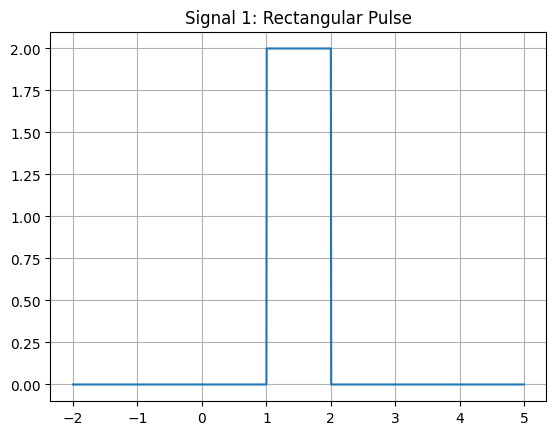

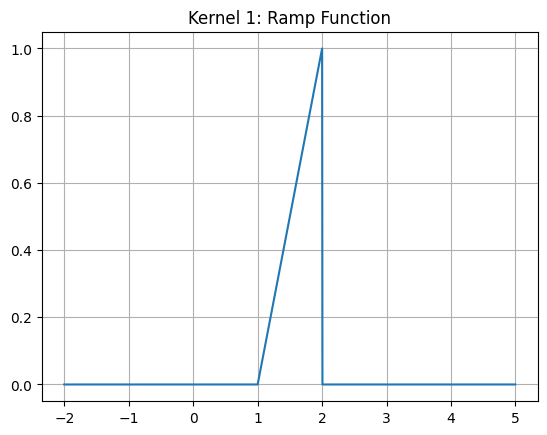

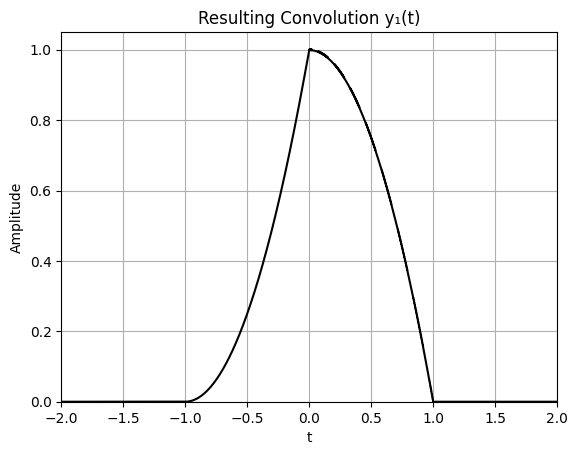

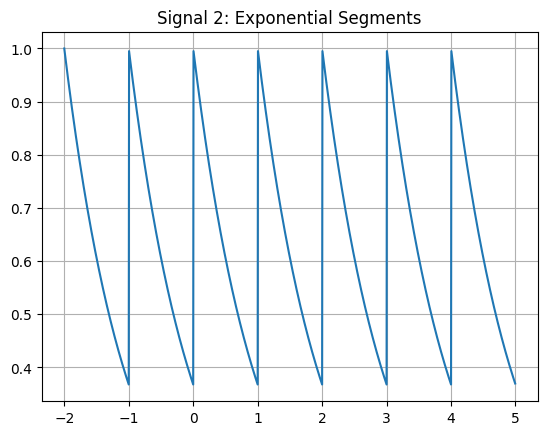

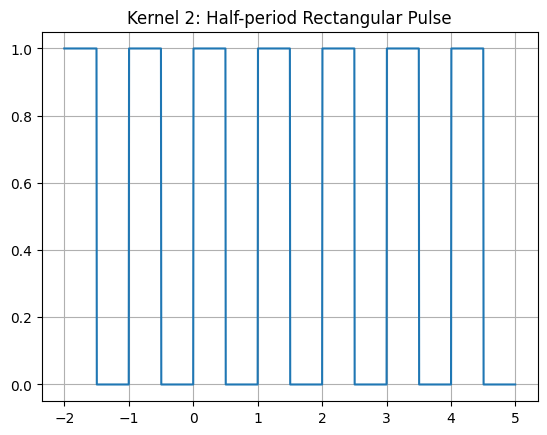

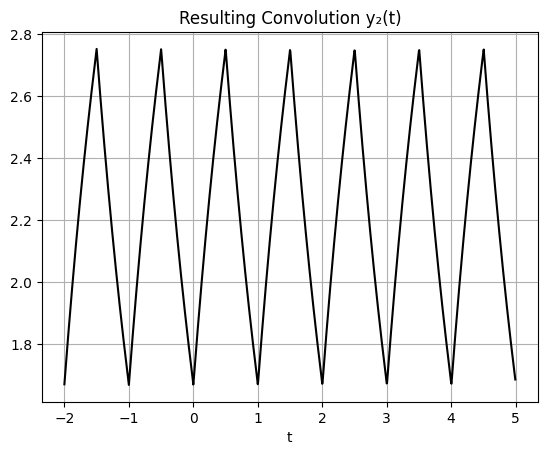

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def manual_continuous_convolution(f1, f2, t_start, t_end, step):
    t_values = np.arange(t_start, t_end, step)
    output = np.zeros_like(t_values)
    for i, t in enumerate(t_values):
        tau = t_values
        integrand = f1(tau) * f2(t - tau)
        output[i] = np.sum(integrand) * step
    return t_values, output

signal_1 = lambda t: np.where((t >= 1) & (t < 2), 2.0, 0.0)
kernel_1 = lambda t: np.where((t >= 1) & (t < 2), t - 1, 0.0)

time1_start, time1_end, delta1 = 0.0, 5.0, 0.001
t_conv1, result1 = manual_continuous_convolution(signal_1, kernel_1, time1_start, time1_end, delta1)

signal_2 = lambda t: np.exp(-np.mod(t, 1))
kernel_2 = lambda t: (np.mod(t, 1) < 0.5).astype(float)

time2_start, time2_end, delta2 = -2.0, 5.0, 0.005
t_values = np.arange(time2_start, time2_end, delta2)
t_conv2, result2 = manual_continuous_convolution(signal_2, kernel_2, time2_start, time2_end, delta2)

plt.figure(); plt.plot(t_values, signal_1(t_values))
plt.title('Signal 1: Rectangular Pulse'); plt.grid(); plt.show()

plt.figure(); plt.plot(t_values, kernel_1(t_values))
plt.title('Kernel 1: Ramp Function'); plt.grid(); plt.show()

plt.figure(); plt.plot(t_conv1 - 3, result1, 'black')
plt.xlim(-2, 2); plt.ylim(0, 1.05)
plt.title('Resulting Convolution y₁(t)'); plt.xlabel('t'); plt.ylabel('Amplitude'); plt.grid(); plt.show()

plt.figure(); plt.plot(t_values, signal_2(t_values))
plt.title('Signal 2: Exponential Segments'); plt.grid(); plt.show()

plt.figure(); plt.plot(t_values, kernel_2(t_values))
plt.title('Kernel 2: Half-period Rectangular Pulse'); plt.grid(); plt.show()

plt.figure(); plt.plot(t_conv2, result2, 'black')
plt.title('Resulting Convolution y₂(t)'); plt.xlabel('t'); plt.grid(); plt.show()

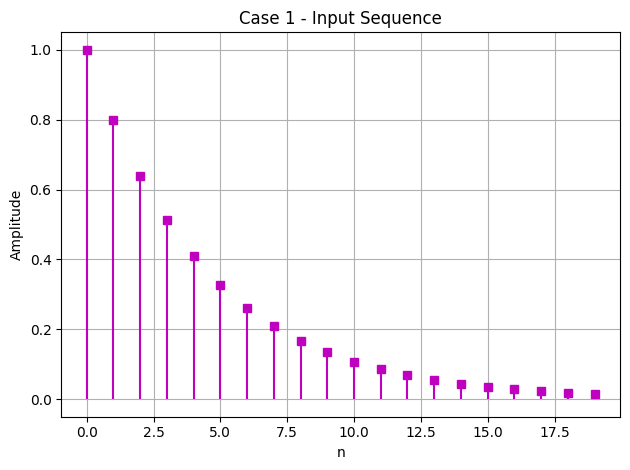

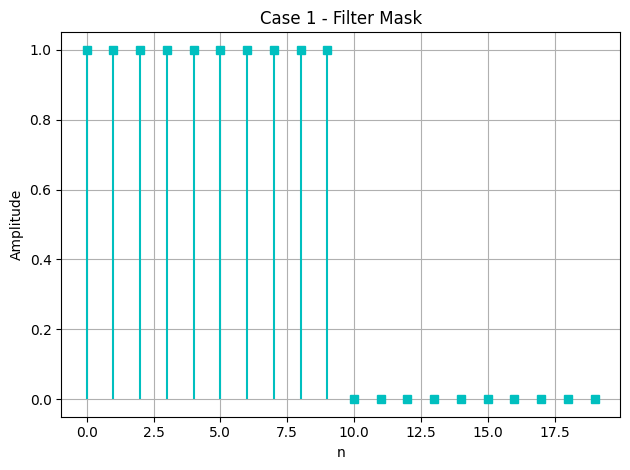

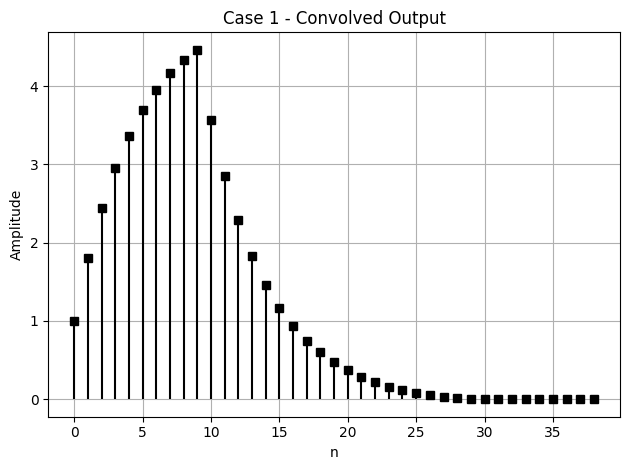

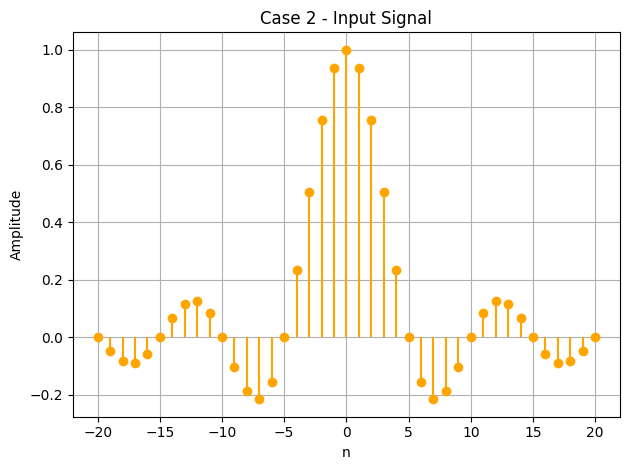

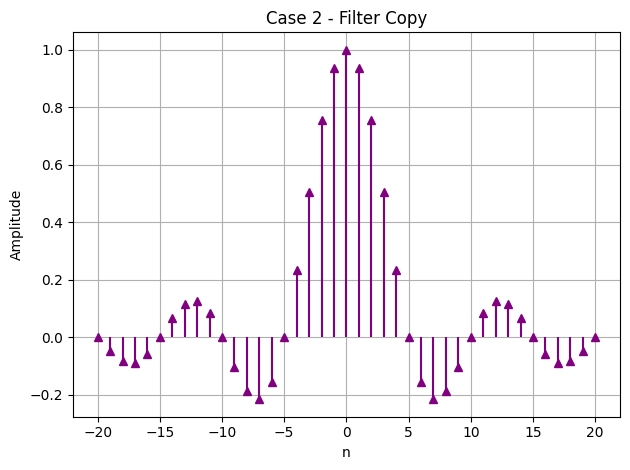

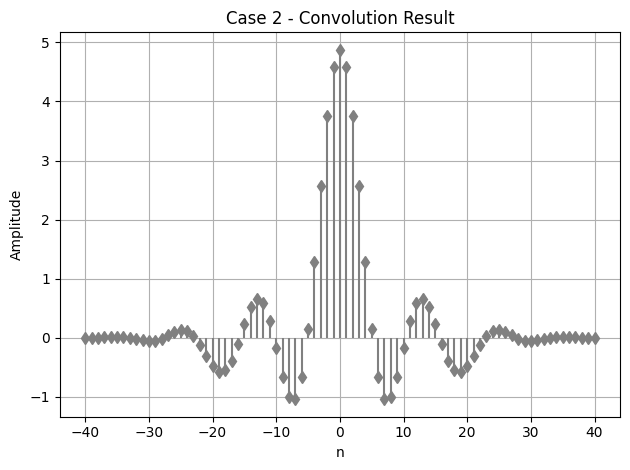

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def manual_discrete_convolution(a, b):
    len_a = len(a)
    len_b = len(b)
    output = np.zeros(len_a + len_b - 1)
    for i in range(len(output)):
        for j in range(len_a):
            if 0 <= i - j < len_b:
                output[i] += a[j] * b[i - j]
    return output
index_a = np.arange(0, 20)
seq_a = 0.8 ** index_a
mask_a = ((index_a >= 0) & (index_a < 10)).astype(float)
conv_a = manual_discrete_convolution(seq_a, mask_a)
range_a = np.arange(len(conv_a))

plt.figure()
plt.stem(index_a, seq_a, basefmt=" ", linefmt='m-', markerfmt='ms')  # magenta
plt.title('Case 1 - Input Sequence')
plt.xlabel('n'); plt.ylabel('Amplitude'); plt.grid(True); plt.tight_layout(); plt.show()

plt.figure()
plt.stem(index_a, mask_a, basefmt=" ", linefmt='c-', markerfmt='cs')  # cyan
plt.title('Case 1 - Filter Mask')
plt.xlabel('n'); plt.ylabel('Amplitude'); plt.grid(True); plt.tight_layout(); plt.show()

plt.figure()
plt.stem(range_a, conv_a, basefmt=" ", linefmt='k-', markerfmt='ks')  # black
plt.title('Case 1 - Convolved Output')
plt.xlabel('n'); plt.ylabel('Amplitude'); plt.grid(True); plt.tight_layout(); plt.show()
index_b = np.arange(-20, 21)
seq_b = np.sinc(index_b / 5)
mask_b = np.copy(seq_b)
conv_b = manual_discrete_convolution(seq_b, mask_b)
range_b = np.arange(len(conv_b)) + 2 * index_b[0]

plt.figure()
plt.stem(index_b, seq_b, basefmt=" ", linefmt='orange', markerfmt='o')  # orange
plt.title('Case 2 - Input Signal')
plt.xlabel('n'); plt.ylabel('Amplitude'); plt.grid(True); plt.tight_layout(); plt.show()

plt.figure()
plt.stem(index_b, mask_b, basefmt=" ", linefmt='purple', markerfmt='^')  # purple
plt.title('Case 2 - Filter Copy')
plt.xlabel('n'); plt.ylabel('Amplitude'); plt.grid(True); plt.tight_layout(); plt.show()

plt.figure()
plt.stem(range_b, conv_b, basefmt=" ", linefmt='gray', markerfmt='d')  # gray
plt.title('Case 2 - Convolution Result')
plt.xlabel('n'); plt.ylabel('Amplitude'); plt.grid(True); plt.tight_layout(); plt.show()

**What is a Kernel?**

A **kernel** (or filter) in convolution is simply a **numerical array** that defines **how a signal should be modified**.
Convolution creates the final effect by blending the kernel's effect into the original signal.  

---

### **Echo**

For an **Echo** effect, the kernel is very simple:

$$
h[n] = [1, 0, 0, \ldots, 0, \alpha]
$$

where:
  
- \( 1 \) → Represents the original sound  
- \( 0, 0, 0, ... \) → Represents the delay (distance between original sound and echo)  
- $\alpha$ → Echo strength (between 0 and 1)  

**Example**

If you want an echo with:  
- **Delay** = 5 samples  
- **Strength** = 0.6  

The kernel looks like this:  
$$
h[n] = [1, 0, 0, 0, 0, 0.6]
$$
This means:  
- The original sound plays immediately  
- After **5 samples**, the echo repeats at **60% volume**  
---
**Question:**

Read the given WAV file.
Create a convolution kernel to generate an echo:
- The echo should have a delay of 200 milliseconds.
- The echo strength should be 60% of the original signal.

Apply the convolution operation to add the echo effect Then plot the original signal and the signal with the echo effect and save the echoed signal as a new .wav file.

- Explain how the output has changed compared to the input.

**Answer :**


Saving 100_Am_Cinematic_SP_48_01.wav to 100_Am_Cinematic_SP_48_01.wav


<ipython-input-14-c2f0685cd165>:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audio = wav.read(io.BytesIO(uploaded[filename]))


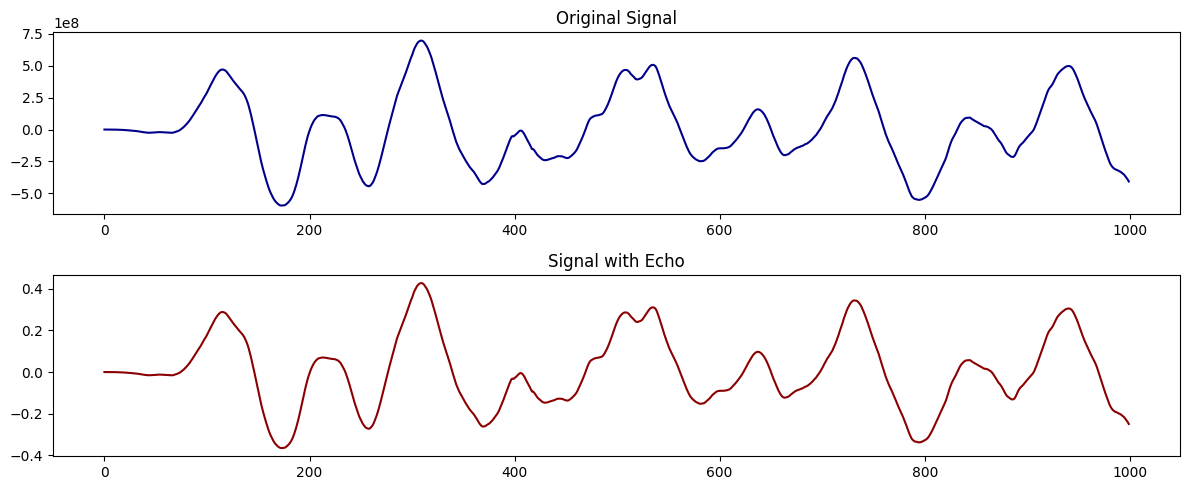

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Echoed audio saved as 'output_echo.wav'


In [14]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.signal import convolve
from google.colab import files
import io

uploaded = files.upload()
filename = next(iter(uploaded))
fs, audio = wav.read(io.BytesIO(uploaded[filename]))

if len(audio.shape) > 1:
    data = audio[:, 0]
else:
    data = audio

delay = int(fs * 0.2)
echo_strength = 0.6
kernel_echo = np.zeros(delay + 1)
kernel_echo[0] = 1.0
kernel_echo[delay] = echo_strength

output = convolve(data, kernel_echo, mode='full')
output = output / np.max(np.abs(output))
output_int16 = np.int16(output * 32767)

wav.write('output_echo.wav', fs, output_int16)

plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(data[:1000], color='darkblue')
plt.title('Original Signal')
plt.subplot(2, 1, 2)
plt.plot(output[:1000], color='darkred')
plt.title('Signal with Echo')
plt.tight_layout()
plt.show()

files.download('output_echo.wav')
print("Echoed audio saved as 'output_echo.wav'")

### **Low-Pass Filter (LPF)**
A Low-Pass Filter (LPF) is a type of filter that allows low-frequency signals to pass through while attenuating (reducing) the strength of high-frequency signals. It's widely used in audio processing, communication systems, and signal processing.

Since higher frequencies are removed, the lower frequencies (bass) become more prominent, resulting in a warmer, fuller sound.
Noise Reduction: High-frequency noise (like hiss, static, or sharp sounds) is suppressed, leading to a cleaner audio signal.

The impulse response of an ideal low-pass filter is given by:

$$
h[n] = \frac{\sin(2 \pi f_c n)}{\pi n}
$$

At frequencies below the cut-off $f_c$
 , the filter output is approximately unchanged.
At frequencies above the cut-off $f_c$
 , the filter gradually or sharply reduces the amplitude of the signal, depending on the filter design (e.g., Butterworth, Chebyshev, etc.).

 **Question:**

Apply this filter with a cutoff frequency of 300 Hz to the given .wav file using convolution. Plot both the input and output signals.

Explain the changes observed in the output.

**Answer:**The low-pass filter removes high-frequency content above 300 Hz, resulting in a smoother, bass-heavy output. High-frequency details like sharp transients or vocals are attenuated, making the sound warmer and less crisp.



<ipython-input-17-318d4993bf54>:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audio = wav.read('100_Am_Cinematic_SP_48_01.wav')


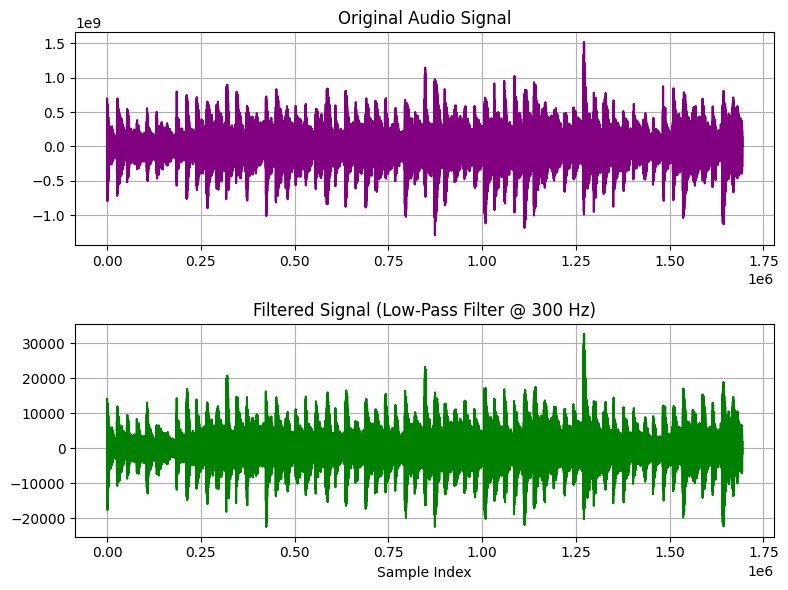

In [17]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

fs, audio = wav.read('100_Am_Cinematic_SP_48_01.wav')
if audio.ndim > 1:
    audio = audio[:, 0]

def create_lpf_kernel(length, cutoff_hz, sampling_rate):
    t = np.arange(-length // 2, length // 2 + 1)
    sinc_filter = np.sinc(2 * cutoff_hz * t / sampling_rate)
    windowed = sinc_filter * np.hamming(length + 1)
    return windowed / np.sum(windowed)

filter_length = 101
cutoff_frequency = 300

lpf_kernel = create_lpf_kernel(filter_length, cutoff_frequency, fs)
filtered_audio = np.convolve(audio, lpf_kernel, mode='same')
normalized_output = np.int16(filtered_audio / np.max(np.abs(filtered_audio)) * 32767)

wav.write('filtered_output_LPF_300Hz.wav', fs, normalized_output)

plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(audio, color='purple')
plt.title('Original Audio Signal')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(normalized_output, color='green')
plt.title('Filtered Signal (Low-Pass Filter @ 300 Hz)')
plt.xlabel('Sample Index')
plt.grid(True)

plt.tight_layout()
plt.show()


### **High-Pass Filter (HPF)**
A High-Pass Filter (HPF) is a type of filter that allows high-frequency signals to pass through while attenuating the strength of low-frequency signals.

 Since lower frequencies are removed, the higher frequencies (like vocals, cymbals, and high notes) become more prominent.

 A high-pass filter can be defined using the relationship between an impulse function $δ[n]$ and a low-pass filter $h_{lp}[n]$:

 $$ h_{hp}[n] = \delta[n] - h_{lp}[n] $$

 At frequencies below the cut-off $f_c$, the filter output is reduced.
At frequencies above the cut-off $f_c$
 , the filter output is approximately unchanged.

 **Question:**
 Apply this filter with a cutoff frequency of 3000 Hz to the given .wav file using convolution. Plot both the input and output signals.

 Explain the changes observed in the output.

 **Answer:**Applying a 3000 Hz low-pass filter preserves most speech and instrument tones while removing only very high-frequency components like hiss or sharp transients. The output sounds slightly smoother but retains clarity and detail.


<ipython-input-18-1aadd8a397db>:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audio = wav.read('100_Am_Cinematic_SP_48_01.wav')


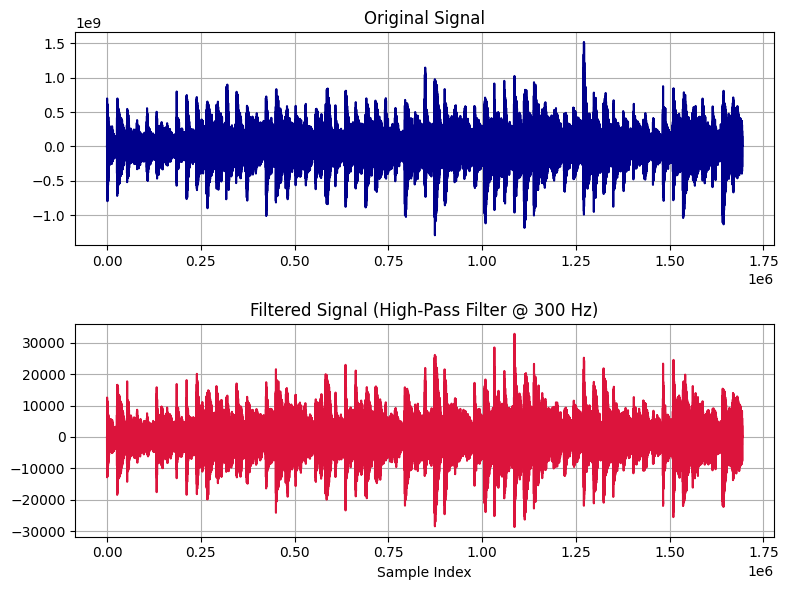

In [18]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

fs, audio = wav.read('100_Am_Cinematic_SP_48_01.wav')
if audio.ndim > 1:
    audio = audio[:, 0]

def design_highpass_filter(length, cutoff_hz, fs):
    t = np.arange(-length // 2, length // 2 + 1)
    sinc_lpf = np.sinc(2 * cutoff_hz * t / fs)
    lpf = sinc_lpf * np.hamming(length + 1)
    lpf /= np.sum(lpf)

    delta = np.zeros_like(lpf)
    delta[len(lpf) // 2] = 1
    hpf = delta - lpf
    return hpf

kernel_size = 101
cutoff_freq = 300

hpf_kernel = design_highpass_filter(kernel_size, cutoff_freq, fs)
filtered = np.convolve(audio, hpf_kernel, mode='same')
filtered = np.int16(filtered / np.max(np.abs(filtered)) * 32767)

wav.write('output_treble_conv.wav', fs, filtered)

plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.plot(audio, color='darkblue')
plt.title('Original Signal')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(filtered, color='crimson')
plt.title('Filtered Signal (High-Pass Filter @ 300 Hz)')
plt.xlabel('Sample Index')
plt.grid(True)

plt.tight_layout()
plt.show()


# 2. 2D convolution

<p>In this section of the homework assignment we will familiarize ourseleves with the concept of 2D convolutions, focusing on its applications in image processing. Convolution is one of the most fundamental operations in image processing and computer vision.
It serves as the backbone for various filtering techniques used for edge detection, blurring, sharpening, and even feature extraction in deep learning models.</p>

<p>In this section, we will:</p>
<ul>
    <li>Understand the concept of 2D convolution from a mathematical perspective.</li>
    <li>Implement 2D convolution <b>from scratch</b> in Python.</li>
    <li>Explore well-known kernels (filters) and their impact on images.</li>
    <li>Apply these kernels to an image and analyze the results.</li>
</ul>


<h2>Understanding 2D Convolution</h2>

<p>In signals and systems, 1D convolution is an operation that combines two signals to produce a third signal,
typically used to analyze how a system responds to an input. Mathematically, given an input signal $ x[n] $ and an impulse response $ h[n] $,
the convolution is defined as:</p>

<p style="text-align:center;">
\[ y[n] = \sum_{k=-\infty}^{\infty} x[k] h[n-k] \]
</p>

<p>This operation slides the flipped version of \( h[n] \) over \( x[n] \), computing a weighted sum at each shift.</p>

<h3>Extending to Two Dimensions</h3>
<p>In image processing, an image can be considered as a discrete 2D signal \( I(m,n) \), where \( m \) and \( n \) represent spatial coordinates.
Similarly, a filter (or kernel) \( K(m,n) \) represents a 2D impulse response. The 2D convolution operation is defined as:</p>

<p style="text-align:center;">
\[ O(i, j) = \sum_{m} \sum_{n} I(i-m, j-n) K(m,n) \]
</p>

<p>This equation states that for each output pixel \( O(i,j) \), the kernel is centered at \( (i,j) \) and a weighted sum is computed over all overlapping pixels in \( I(m,n) \).
This is directly analogous to 1D convolution, but extended into two spatial dimensions.</p>

<p>
We're going to implement a function that accepts an image, a kernel and the options regarding padding and stride and returns the result image as output.
<p>

**NOTE: You are not allowed to use built-in functions to perform convolution.**

<h3>Key Parameters:</h3>
<ul>
    <li><b>Image \( I(m,n) \):</b> The input 2D discrete signal.</li>
    <li><b>Kernel \( K(m,n) \):</b> The 2D impulse response applied to the image.</li>
    <li><b>Padding:</b> If set to "same", the output maintains the same dimensions as the input by zero-padding the borders.</li> if it's "valid" then theere will be no padding.
    <li><b>Stride:</b> Defines the step size at which the kernel moves across the image.</li>
</ul>

<p><b>Important Note:</b> Unlike many traditional convolution operations in DSP, in image processing, the kernel is typically not flipped before applying the sum.
This is often called "cross-correlation" in the signal processing sense, but the term "convolution" is conventionally used in image processing.</p>

<h3>
An illustration of 2D convolution:
</h3>
<center width=\"100%\"><img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/dilation.gif" width="250px"></center>



In [ ]:
def convolution_2d(image, kernel, padding='same', stride=1):
    # Get image and kernel dimensions
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Define padding size if 'same' is used
    if padding == 'same':
        pad_h = kernel_height // 2
        pad_w = kernel_width  // 2
        padded_image = np.pad(
            image,
            ((pad_h, pad_h), (pad_w, pad_w)),
            mode='constant',
            constant_values=0
        )
    else:
        pad_h = pad_w = 0
        padded_image = image

    # Get new image dimensions after convolution
    new_height = img_height + 2*pad_h - kernel_height + 1
    new_width  = img_width  + 2*pad_w - kernel_width  + 1
    output = np.zeros((new_height, new_width), dtype=float)

    # Perform convolution
    for i in range(0, new_height, stride):
        for j in range(0, new_width, stride):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(region * kernel)

    result = np.clip(output, 0, 255).astype(np.uint8)
    return result





## Kernels

First we load and display the image we want to work with (The image is uploaded as Q2_image). Then we will introduce our kernels.

Saving Q2_image.jpg to Q2_image (4).jpg


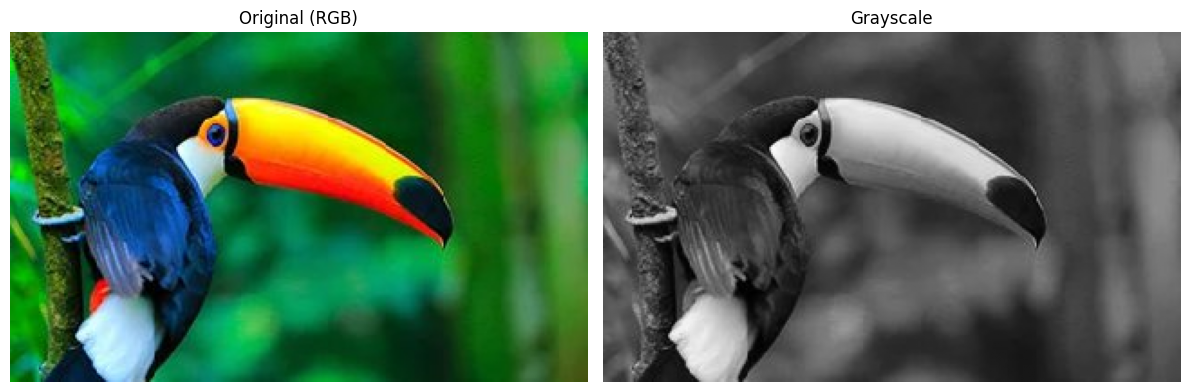

In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np

# File upload remains unchanged as per requirements
uploaded = files.upload()
file_name = next(iter(uploaded.keys()))

# Image processing pipeline
def load_and_process_image(filename):
    # Load image with explicit color format
    input_img = cv2.imread(filename, cv2.IMREAD_COLOR)
    if input_img is None:
        raise FileNotFoundError(f"Image {filename} could not be loaded")

    # Convert color spaces
    rgb_converted = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    grayscale_converted = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    return rgb_converted, grayscale_converted

# Process the image
original_rgb, grayscale_img = load_and_process_image(file_name)

# Visualization setup
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display original RGB image
ax1.imshow(original_rgb)
ax1.set_title("Original (RGB)")
ax1.axis("off")

# Display grayscale image
ax2.imshow(grayscale_img, cmap="gray", vmin=0, vmax=255)
ax2.set_title("Grayscale")
ax2.axis("off")

# Adjust layout and display
figure.tight_layout()
plt.show()

<h3>Sobel Edge Detection</h3>
<p>The Sobel kernel detects edges in an image by highlighting regions where intensity changes rapidly. It is applied separately for horizontal and vertical edges.</p>
<h4>Sobel X and Y Kernels</h4>
$$
S_x =
\begin{bmatrix}
-1 &  0 &  1 \\
-2 &  0 &  2 \\
-1 &  0 &  1
\end{bmatrix}
$$

$$
S_y =
\begin{bmatrix}
-1 & -2 & -1 \\
 0 &  0 &  0 \\
 1 &  2 &  1
\end{bmatrix}
$$

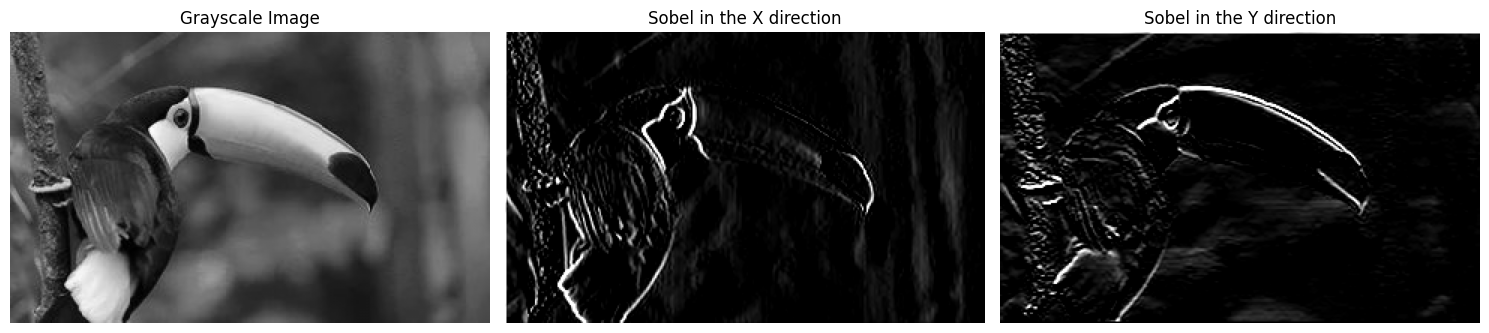

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Define the Sobel kernels
s_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
s_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

result_x = convolution_2d(img, s_x, padding='same', stride=1)
result_y = convolution_2d(img, s_y, padding='same', stride=1)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Grayscale Image")
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.subplot(1, 3, 2)
plt.title("Sobel in the X direction")
plt.axis("off")
plt.imshow(result_x, cmap="gray")
plt.subplot(1, 3, 3)
plt.title("Sobel in the Y direction")
plt.axis("off")
plt.imshow(result_y, cmap="gray")

plt.tight_layout()
plt.show()

<h3>Prewitt Edge Detection</h3>
<p>The Prewitt operator is used for detecting edges in both the x (vertical) and y (horizontal) directions.
It works similarly to the Sobel operator but gives equal weight to all neighboring pixels in the kernel. This makes it less robust againts noise but computationally less expensive. Why is that? </p>

---
**Answer:**the Prewitt operator reduces computational cost by using uniform weights but sacrifices robustness because it doesn't suppress noise as effectively as Sobel's weighted kernels.


---


<h4>Prewitt X and Y kernels</h4>

$$
P_x =
\begin{bmatrix}
 -1 & 0 & 1 \\
 -1 & 0 & 1 \\
 -1 & 0 & 1
\end{bmatrix}
$$

$$
P_y =
\begin{bmatrix}
-1 & -1 & -1 \\
 0 &  0 &  0 \\
 1 &  1 &  1
\end{bmatrix}
$$

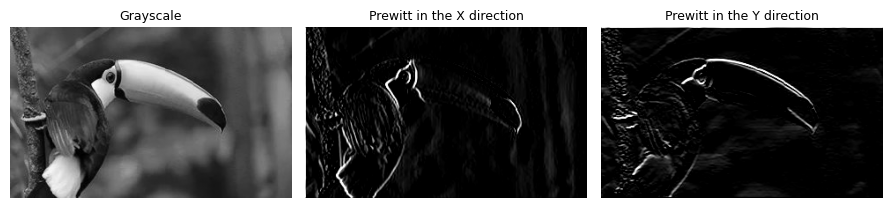

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Prewitt kernels
p_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
p_y = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])
result_x = convolution_2d(img, p_x, padding='same', stride=1)
result_y = convolution_2d(img, p_y, padding='same', stride=1)
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.title("Grayscale", fontsize=9)
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.subplot(1, 3, 2)
plt.title("Prewitt in the X direction", fontsize=9)
plt.axis("off")
plt.imshow(result_x, cmap="gray")
plt.subplot(1, 3, 3)
plt.title("Prewitt in the Y direction", fontsize=9)
plt.axis("off")
plt.imshow(result_y, cmap="gray")

plt.tight_layout(pad=1.0)
plt.show()


<h3>Gaussian Blur</h3>
<p>The Gaussian Blur kernel smooths the image by averaging pixel intensities, reducing noise.</p>

$$
K_b=
\frac{1}{16} \times \begin{bmatrix}
1 &  2 &  1 \\
2 &  4 &  2 \\
1 &  2 &  1
\end{bmatrix}
$$

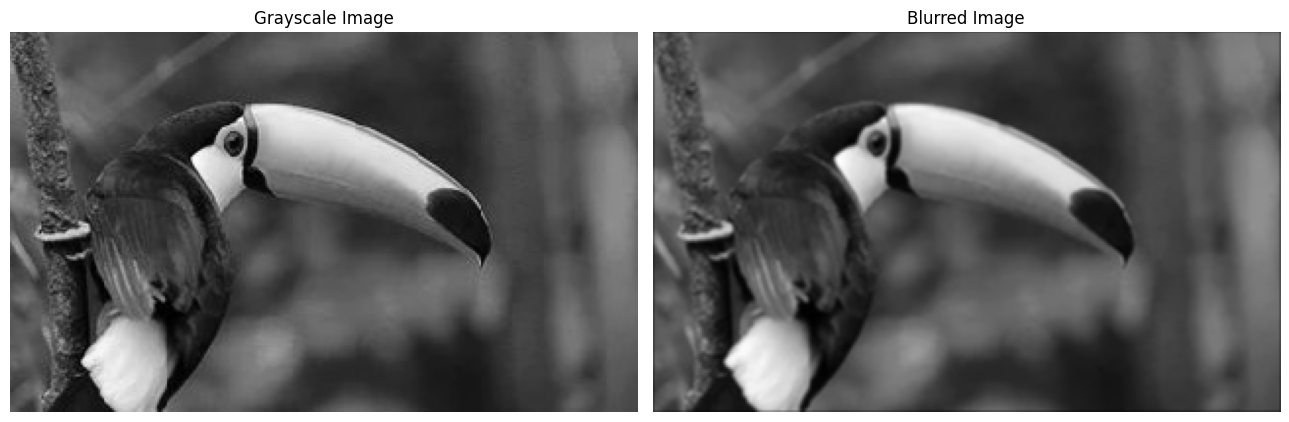

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k_b = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=float) / 16.0

result = convolution_2d(img, k_b, padding='same', stride=1)
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Blurred Image")
plt.axis("off")
plt.imshow(result, cmap="gray")

plt.tight_layout()
plt.show()

<h3>Sharpening Filter</h3>
<p>The sharpening filter enhances edges by emphasizing differences between adjacent pixels.</p>

$$
K_s =
\begin{bmatrix}
0 &  -1 &  0 \\
-1 &  5 &  -1 \\
0 &  -1 &  0
\end{bmatrix}
$$

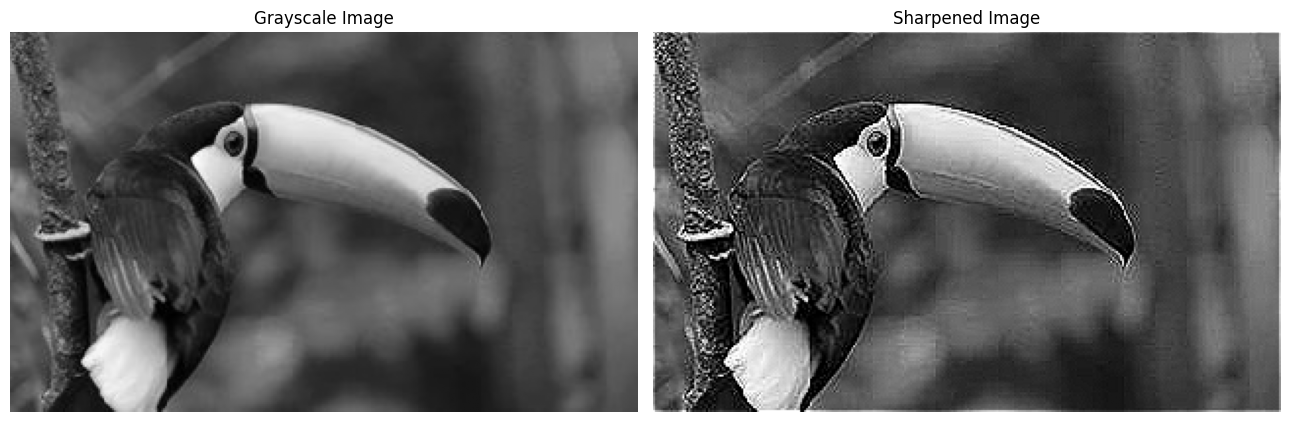

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k_s = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

result = convolution_2d(img, k_s, padding='same', stride=1)

plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Sharpened Image")
plt.axis("off")
plt.imshow(result, cmap="gray")
plt.tight_layout()
plt.show()

# 3. 1D correlation

## Definition and Formulation of Cross-Correlation

Cross-correlation (often simply referred to as correlation) is a mathematical operation that measures the similarity between two signals as a function of the time lag (or shift) applied to one of them. It is commonly used in signal processing, pattern recognition, and time-series analysis to identify how much one signal resembles a shifted version of another. Cross-correlation can be thought of as a **sliding dot product** between two signals.

### Mathematical Formulation

The cross-correlation between two continuous-time signals \( x(t) \) and \( y(t) \) is defined as:

$$
R_{xy}(\tau) = (x \star y)(\tau) \overset{\Delta}{=} \int_{-\infty}^{+\infty} x^*(t) \, y(t+\tau) \, dt \quad \text{(continuous time)}
$$

For discrete-time signals \( x[n] \) and \( y[n] \), the cross-correlation is defined as:

$$
R_{xy}[n] = (x \star y)[n] \overset{\Delta}{=} \sum_{m=-\infty}^{+\infty} x^*[m] \, y[m+n] \quad \text{(discrete time)}
$$

Here:
- \( $R_{xy}(\tau)$ \) or \( $R_{xy}[n]$ \) represents the cross-correlation at time lag \( $\tau$ \) or \( $n$ \).
- \( $x^*(t)$ \) or \( $x^*[m]$ \) denotes the complex conjugate of \( x(t) \) or \( $x[m]$ \) (for complex signals). For real-valued signals, this simplifies to \( $x(t)$ \) or \( $x[m]$ \).
- \( $\tau$ \) or \( $n$ \) is the time shift applied to the second signal \( y \).

### Relationship Between Correlation and Convolution

The cross-correlation formula is very similar to convolution, but with a key difference: **correlation does not involve time-reversing one of the signals**. The relationship between correlation and convolution can be expressed as:

$$
(x \star y)(\tau) = (x^*(-t) * y(t))(\tau)
$$

Where:
- \( $\star$ \) denotes cross-correlation.
- \( * \) denotes convolution.
- \( $x^*(-t)$ \) is the time-reversed and complex-conjugated version of \( x(t) \).

In simpler terms:
- **Convolution**: One signal is reversed in time, then slid over the other, and the integral (or sum) is computed at each shift.
- **Correlation**: The signals are not reversed in time, but the same sliding and integration process is performed.

### Visualization

To better understand the difference between correlation and convolution, consider the following illustration:

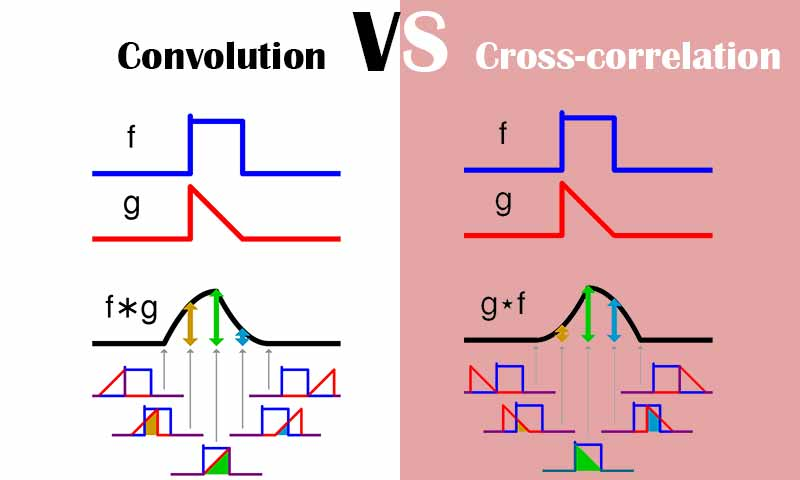

In the image:
- **Correlation**: The kernel (or second signal) is not flipped before sliding.
- **Convolution**: The kernel is flipped before sliding.

This distinction is crucial in applications where the direction of the signal matters, such as in pattern matching or time-delay estimation.

---

### Task 1: Cross-Correlation Implementation and Testing
In the following section you should:
- Implement a cross correlation function.
- Create a rectangular pulse signal and a shifted version of the signal then output their plot and cross-correlation in another plot.
- Print the index of the maximum value in the correlation output. What do you observe? This property will be used in later sections for finding patterns in a signal.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cross_correl(x, y):
    n = len(x) + len(y) - 1
    result = np.zeros(n)
    for i in range(n):
        for j in range(len(x)):
            if 0 <= i - j < len(y):
                result[i] += x[j] * y[i - j]

    return result

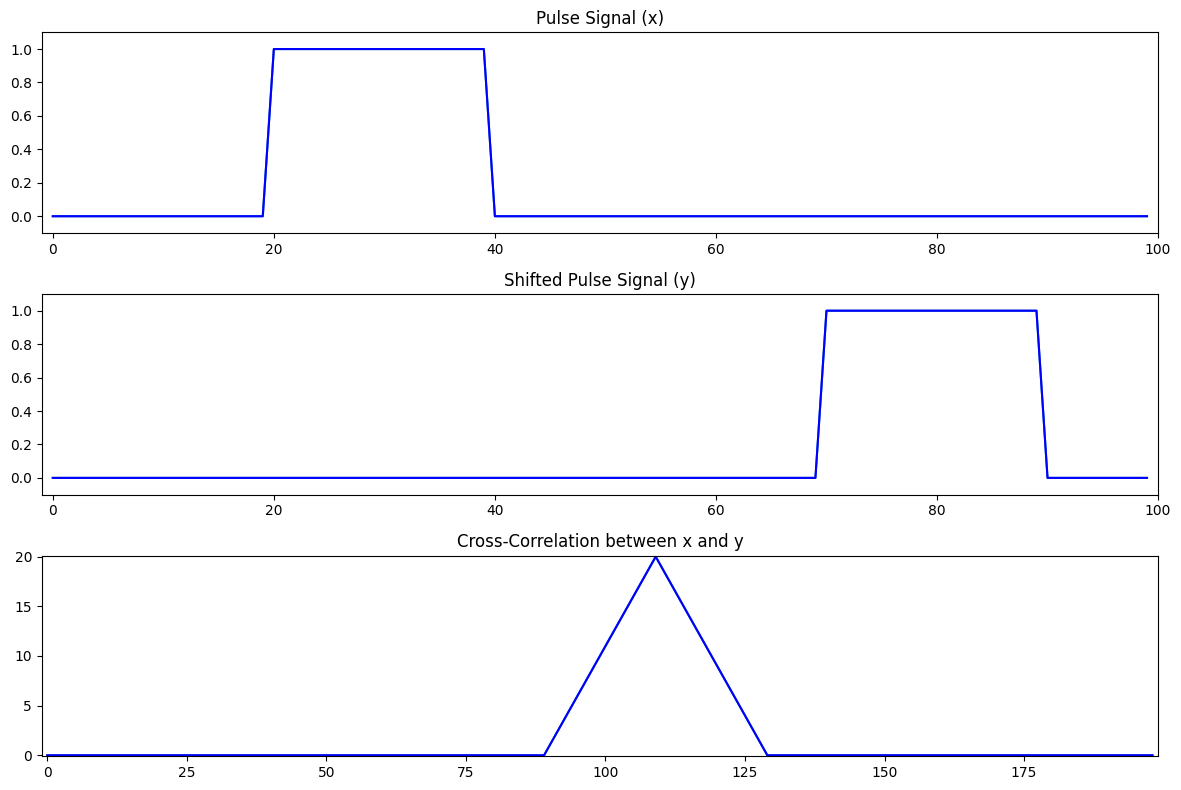

Index of the maximum value in the correlation: 109


In [ ]:

L = 100
pulse_width = 20
shift = 50
pulse_start = 20
n = range(L)
x = np.zeros(L)
y = np.zeros(L)
x[pulse_start:pulse_start + pulse_width] = 1
y[pulse_start + shift:pulse_start + shift + pulse_width] = 1
r_xy = cross_correl(x, y)
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(n, x)
plt.plot(n,x , color = 'blue')
plt.title("Pulse Signal (x)")
plt.xlim(-1, L)
plt.ylim(-0.1, 1.1)
plt.subplot(3, 1, 2)
plt.plot(n, y)
plt.plot(n,y , color = 'blue')
plt.title("Shifted Pulse Signal (y)")
plt.xlim(-1, L)
plt.ylim(-0.1, 1.1)
plt.subplot(3, 1, 3)
plt.plot(range(len(r_xy)), r_xy)
plt.plot(range(len(r_xy)), r_xy,color='blue')
plt.title("Cross-Correlation between x and y")
plt.xlim(-1, len(r_xy))
plt.ylim(min(r_xy) - 0.1, max(r_xy) + 0.1)
plt.tight_layout()
plt.show()
max_index = np.argmax(r_xy)
print(f"Index of the maximum value in the correlation: {max_index}")


### Task 2: Filtering Using Correlation
In this part, you will perform filtering using **correlation**. While filtering is often done using convolution, correlation is more straightforward because it doesn’t require reversing the kernel. Here’s what you’ll do:

- Construct a signal with both **high-frequency** and **low-frequency** components. For example, combine a **step function** with a **sine wave** (high-frequency).
- Create a **low-pass filter** using a simple averaging kernel (rectangular kernel).
- Create a **high-pass filter** by subtracting the low-pass kernel from an impulse (spike).
- Apply the low-pass and high-pass filters to the signal using correlation.
- Plot the original signal, the filtered signals, and the reconstructed signal.
- Add the low-pass and high-pass filtered signals together. They should reconstruct the original signal.(Why?)

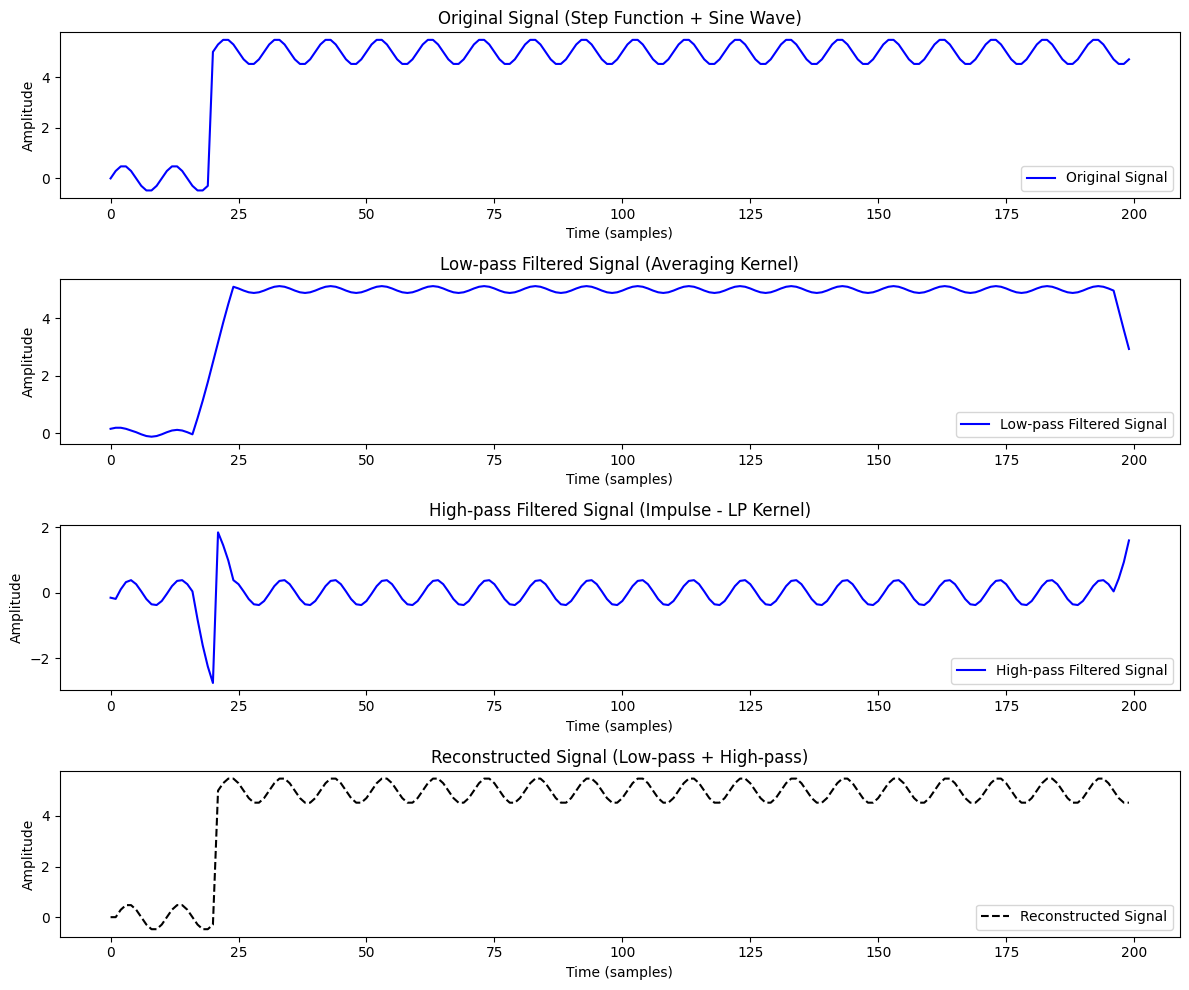

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 200
kernel_size = 8
n = np.arange(N)

signal = 5 * np.heaviside(n - 20, 1) + 0.5 * np.sin(2 * np.pi * n / 10)
lp_kernel = np.ones(kernel_size) / kernel_size
hp_kernel = np.zeros(kernel_size)
hp_kernel[int(kernel_size / 2)] = 1
hp_kernel -= lp_kernel
signal_lp = np.convolve(signal, lp_kernel, mode='same')
signal_hp = np.convolve(signal, hp_kernel, mode='same')
signal_reconstructed = signal_lp + signal_hp
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(n, signal, label="Original Signal", color='b')
plt.title("Original Signal (Step Function + Sine Wave)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(n, signal_lp, label="Low-pass Filtered Signal", color='b')
plt.title("Low-pass Filtered Signal (Averaging Kernel)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(n, signal_hp, label="High-pass Filtered Signal", color='b')
plt.title("High-pass Filtered Signal (Impulse - LP Kernel)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(n, signal_reconstructed, label="Reconstructed Signal", color='black', linestyle='--')
plt.title("Reconstructed Signal (Low-pass + High-pass)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

## Application: Pattern Detection

One of the most powerful applications of cross-correlation is **pattern detection**. Here's how it works:

1. **Pattern Signal**: Suppose you have a known pattern signal $p(t)$ (e.g., a specific shape, sound, or feature).
2. **Target Signal**: You also have a longer signal $s(t)$ in which you want to detect occurrences of the pattern $p(t)$.
3. **Correlation Process**: By computing the cross-correlation between $p(t)$ and $s(t)$, you obtain a new signal $R_{ps}(\tau)$. Peaks in $R_{ps}(\tau)$ indicate where the pattern $p(t)$ is most similar to $s(t)$ at a specific time shift $\tau$.

Mathematically, this is expressed as:

$$
R_{ps}(\tau) = \int_{-\infty}^{+\infty} p^*(t) \, s(t+\tau) \, dt \quad \text{(continuous time)}
$$

or

$$
R_{ps}[n] = \sum_{m=-\infty}^{+\infty} p^*[m] \, s[m+n] \quad \text{(discrete time)}
$$

In points where the pattern is found the signal will have peaks, these peaks can then be detected by a simple threshold or more advanced techniques.

### Practical Examples of Pattern Detection

1. **Communication Systems**:
   - In noisy communication channels, cross-correlation is used to detect known signal patterns (e.g., synchronization sequences) within a received signal. This helps in decoding messages accurately despite noise.

2. **Image Processing**:
   - In object detection, a template image (pattern) is cross-correlated with a larger image to locate instances of the template. For example, finding a specific object in a photograph or detecting edges in an image.

3. **Neuroscience**:
   - Neurons in the brain use a form of cross-correlation to recognize patterns in sensory input. For instance, the visual cortex correlates incoming visual signals with stored patterns to identify objects or faces. While the brain's mechanism is far more complex, the underlying principle is similar.

### Task 3
Here you will create a long noise signal, add the pattern signal to it several times, then use correlation to find the patterns in the noisy signal.

- In the following part you should create a long signal then place the given pattern in it 3 times.
- Then you should add gaussian noises of ratio 0.1, 0.5 ,1, 4.0 to the max of the pattern and plot each of the signals (if you don't know what gaussian noise is, don't worry! just use np.random.normal())
- Now you should use your correlation function and correlate the pattern kernel with the noisy signal; then plot the outputs.

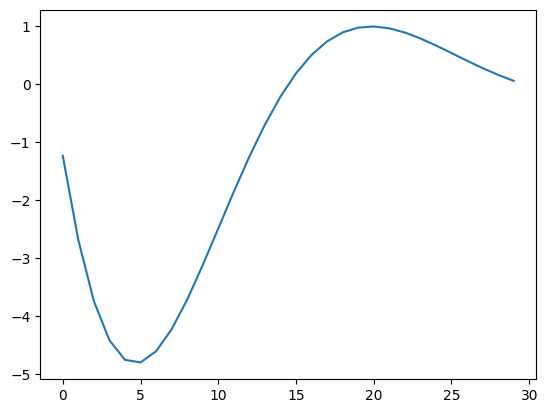

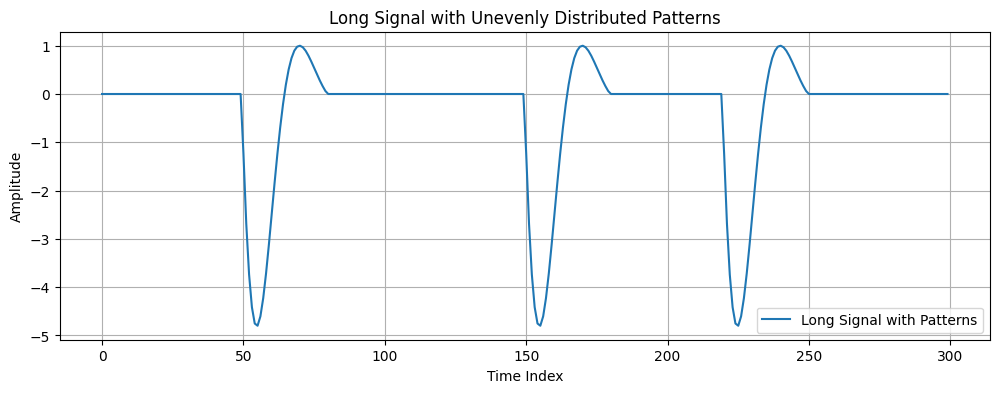

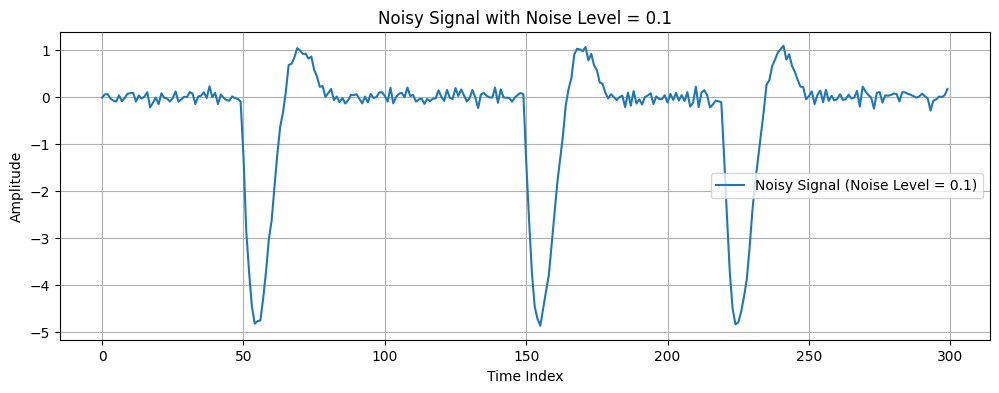

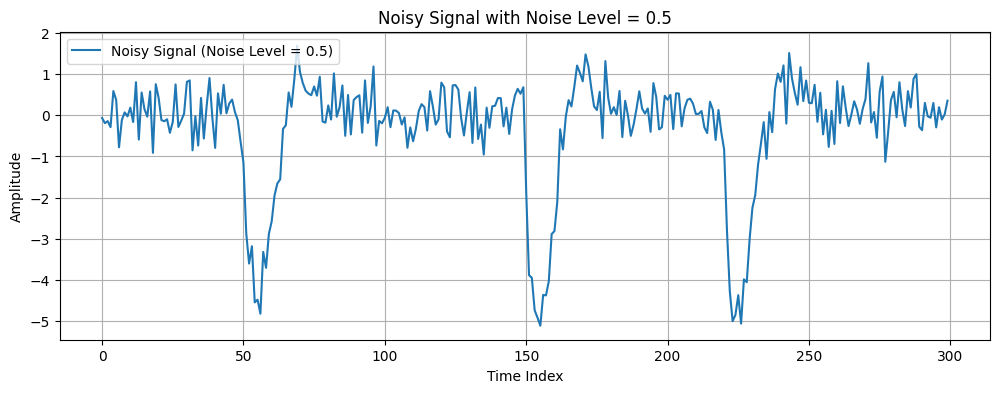

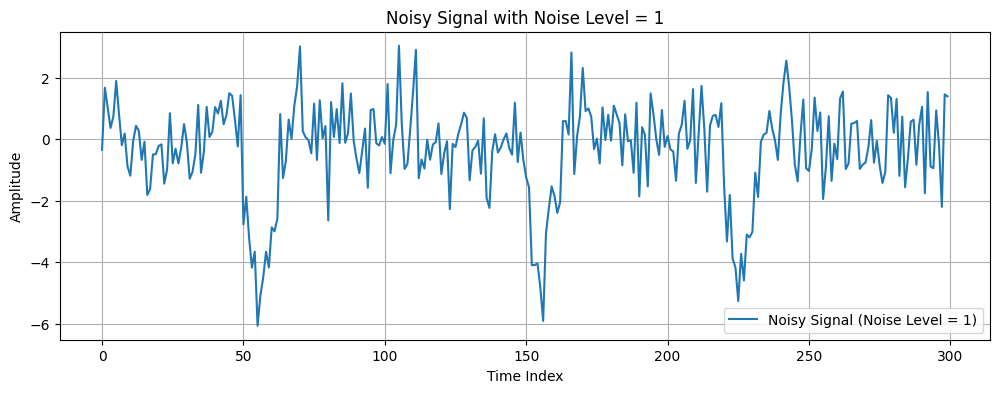

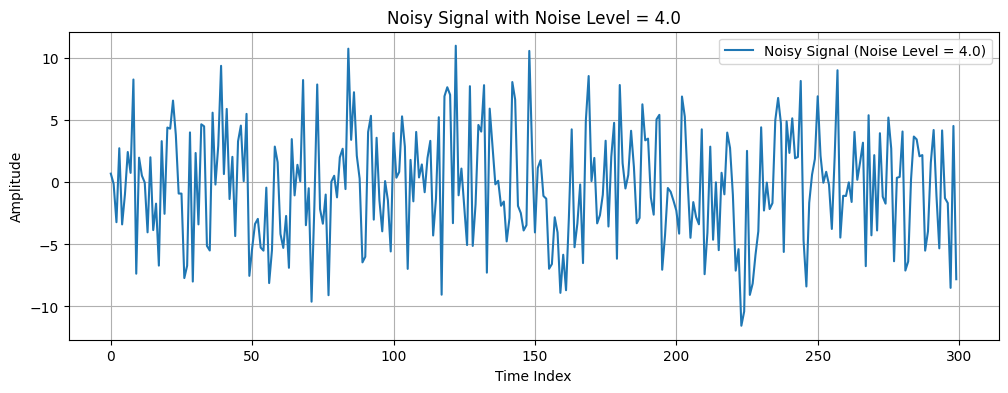

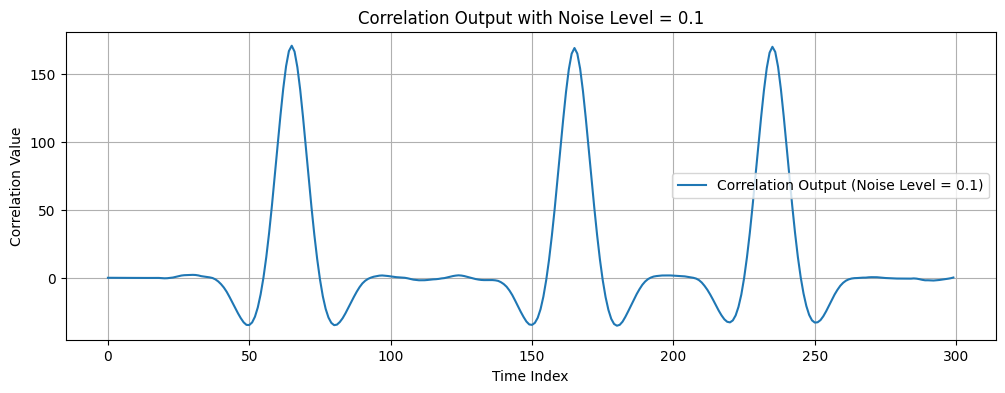

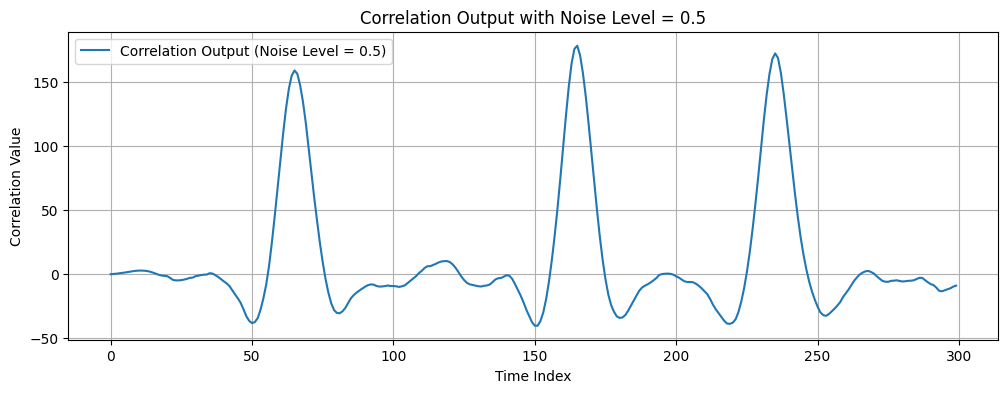

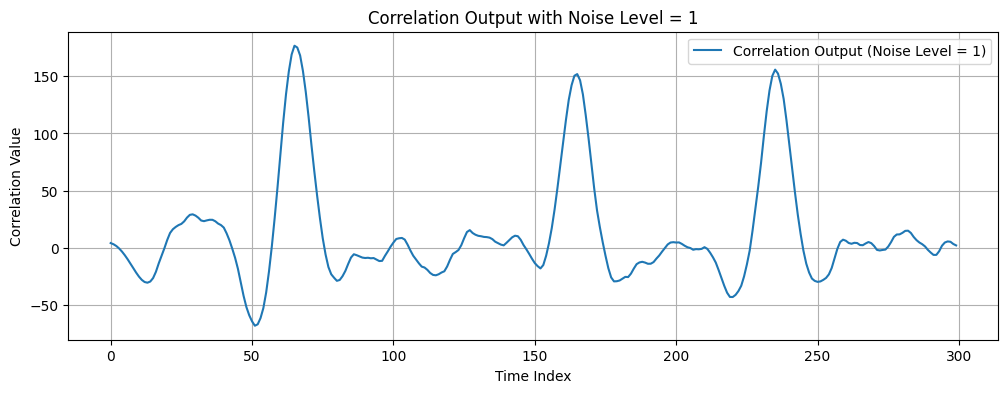

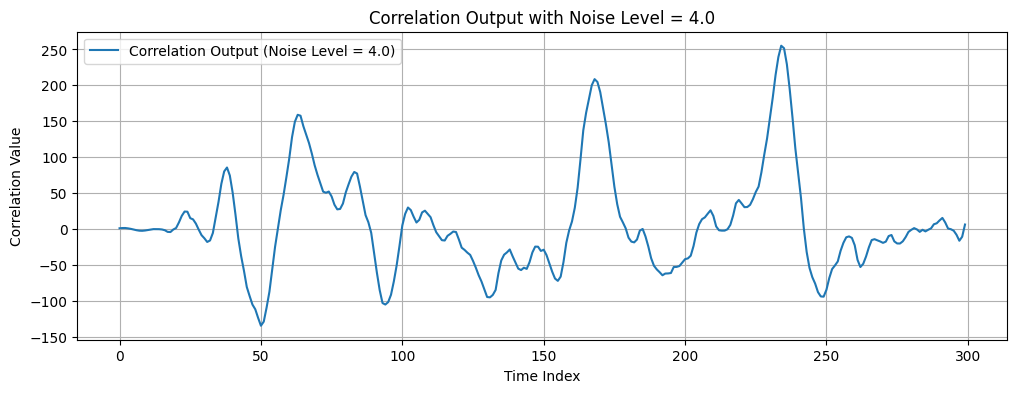

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# !!! Do not change this part of the code !!!
x = np.linspace(-3, 3, 30)
pattern = np.sin(x) * np.exp(-0.5 * x)
pattern = pattern / np.max(pattern)

plt.plot(pattern, label="pattern signal")
long_signal_length = 300
long_signal = np.zeros(long_signal_length)

pattern_length = len(pattern)
locations = [50, 150, 220]

for loc in locations:
    long_signal[loc:loc + pattern_length] += pattern

plt.figure(figsize=(12, 4))
plt.plot(long_signal, label="Long Signal with Patterns")
plt.title("Long Signal with Unevenly Distributed Patterns")
plt.xlabel("Time Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

noise_levels = [0.1, 0.5, 1, 4.0]

noisy_signals = []
for i, noise_level in enumerate(noise_levels):
    noise = np.random.normal(scale=noise_level, size=long_signal_length)
    noisy_signal = long_signal + noise
    noisy_signals.append(noisy_signal)

    plt.figure(figsize=(12, 4))
    plt.plot(noisy_signal, label=f"Noisy Signal (Noise Level = {noise_level})")
    plt.title(f"Noisy Signal with Noise Level = {noise_level}")
    plt.xlabel("Time Index")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.show()
def cross_correlation(signal, kernel):
    """Compute cross-correlation between a signal and a kernel."""
    from scipy.signal import correlate
    return correlate(signal, kernel, mode='same')

for i, noisy_signal in enumerate(noisy_signals):
    correlation_output = cross_correlation(noisy_signal, pattern)

    plt.figure(figsize=(12, 4))
    plt.plot(correlation_output, label=f"Correlation Output (Noise Level = {noise_levels[i]})")
    plt.title(f"Correlation Output with Noise Level = {noise_levels[i]}")
    plt.xlabel("Time Index")
    plt.ylabel("Correlation Value")
    plt.grid(True)
    plt.legend()
    plt.show()

# 4. Camera Movement Detection

Consider the problem of determining the displacement of a camera between two consecutive video frames. One might initially consider simply normalizing both frames and computing the correlation of one frame with a shifted version of itself. However, this approach often fails. why?

---
**Answer**:
Correlation fails for displacement estimation because it assumes consistent motion and brightness, but real frames have local motion, lighting changes, and occlusions.
---

A more robust method involves using the **Sobel filter**, an edge-detection operator that calculates the gradient of the image intensity, thereby highlighting areas of rapid intensity change—that is, the edges. The Sobel filter applies two distinct $3×3$ kernels: one for detecting horizontal changes, denoted as $Gₓ$, and one for detecting vertical changes, denoted as $Gᵧ$. The standard Sobel kernels are defined as follows:

$$
G_x = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}, \qquad
G_y = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}.
$$

These kernels emphasize the edges by computing differences in intensity, providing a more reliable representation for matching across frames than raw pixel intensities.

The proposed approach proceeds as follows:

1. **Apply Sobel Filter:**  
   Apply the Sobel filter to each of the two frames to obtain their respective gradient maps. Visualize these maps to understand the edge structures within each frame.

2. **Shift the First Frame:**  
   Define a function that shifts the first frame in any direction. When performing the shift, any pixels that move outside the frame boundaries should be filled with zero.

3. **Mesh Grid of Potential Shifts:**  
   Establish a mesh grid of potential shifts defined by a maximum shift parameter, $T$, such that the grid spans from $(-T, -T)$ to $(T, T)$.

4. **Correlation Computation:**  
   For every possible shift \( $\Delta x, \Delta y$ \) within this grid, compute a correlation value by summing the products of the corresponding gradient values from the shifted version of frame one and frame two over the overlapping region. Specifically, for a given shift \($\Delta x, \Delta y$\), the correlation is defined as:

   $$
   \text{Correlation}(\Delta x, \Delta y) = \sum_{i,j} \Bigl[ G_x^{(1)}(i+\Delta x, j+\Delta y) \cdot G_x^{(2)}(i,j) + G_y^{(1)}(i+\Delta x, j+\Delta y) \cdot G_y^{(2)}(i,j) \Bigr],
   $$

   where $G_x^{(1)}$ and $G_y^{(1)}$ denote the Sobel gradients of the first frame, and $G_x^{(2)}$ and $G_y^{(2)}$ denote those of the second frame.

5. **Determine the Optimal Shift:**  
   Identify the shift \($\Delta x^*, \Delta y^*$\) that yields the highest correlation value. This optimal shift is considered the estimated camera movement between the frames.

---

**Question:**  
Discuss the strengths and limitations of the described approach for camera movement detection. Provide a detailed analysis of the conditions under which this method might not accurately capture the true camera displacement. In your discussion, include the mathematical reasoning behind the correlation computation and the use of the Sobel filter for edge detection.

---

**Answer**:The Sobel-gradient correlation method improves robustness to lighting changes by focusing on edges rather than raw pixel values. It computes image gradients using Sobel filters, then finds the displacement with the highest gradient correlation.

---


Saving frame(1).jpg to frame(1) (1).jpg


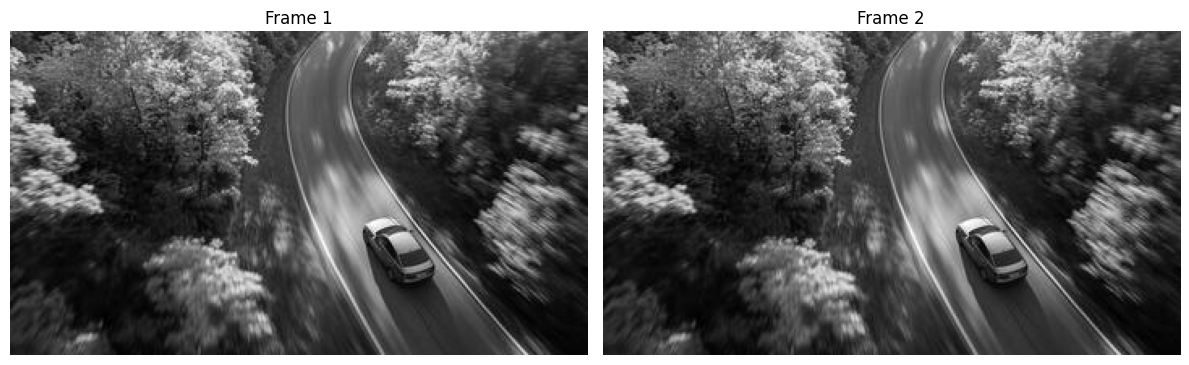

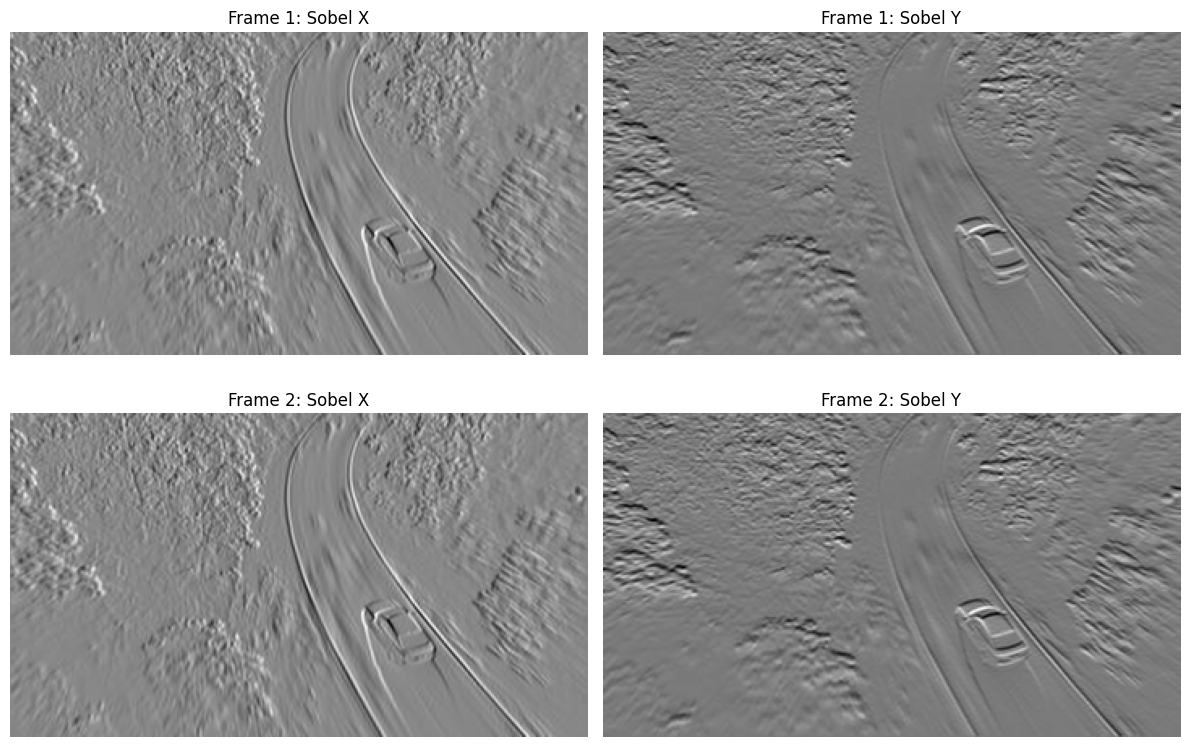

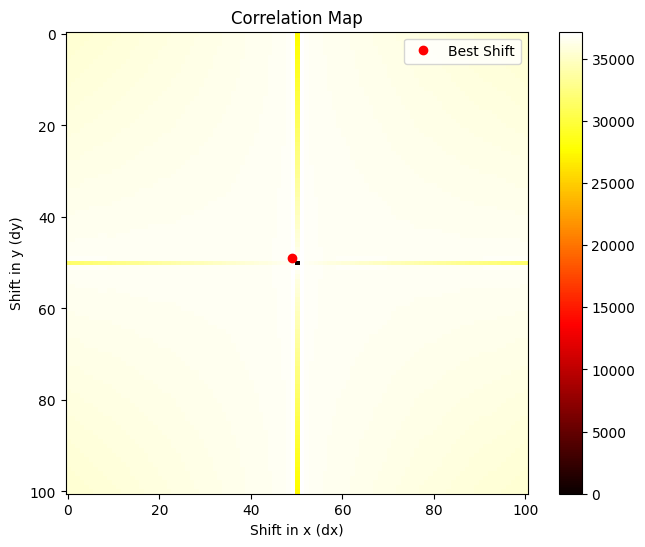

Best shift: dx = -1, dy = -1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image
from google.colab import files

uploaded = files.upload()
image_path = next(iter(uploaded))
img_gray = np.array(Image.open(image_path).convert('L'))
ref_image = np.array(img_gray)
comp_image = np.array(img_gray)
def translate(img, offset_y, offset_x):
    result = np.zeros_like(img)
    if offset_y > 0:
        result[offset_y:, :] = img[:-offset_y, :]
    elif offset_y < 0:
        result[:offset_y, :] = img[-offset_y:, :]
    if offset_x > 0:
        result[:, offset_x:] = img[:, :-offset_x]
    elif offset_x < 0:
        result[:, :offset_x] = img[:, -offset_x:]
    return result

def scale_to_unit(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())

ref_image = scale_to_unit(ref_image)
comp_image = scale_to_unit(comp_image)
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
ref_gx = scale_to_unit(convolve(ref_image, sobel_h))
ref_gy = scale_to_unit(convolve(ref_image, sobel_v))
comp_gx = scale_to_unit(convolve(comp_image, sobel_h))
comp_gy = scale_to_unit(convolve(comp_image, sobel_v))
max_shift = 50
corr_matrix = np.zeros((2 * max_shift + 1, 2 * max_shift + 1))
def gradient_alignment_score(off_y, off_x):
    moved_x = translate(ref_gx, off_y, off_x)
    moved_y = translate(ref_gy, off_y, off_x)
    return np.sum(moved_x * comp_gx + moved_y * comp_gy)
offsets = range(-max_shift, max_shift + 1)
for idx_y, dy in enumerate(offsets):
    for idx_x, dx in enumerate(offsets):
        corr_matrix[idx_y, idx_x] = gradient_alignment_score(dy, dx)
peak_idx = np.unravel_index(np.argmax(corr_matrix), corr_matrix.shape)
optimal_dy = offsets[peak_idx[0]]
optimal_dx = offsets[peak_idx[1]]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ref_image, cmap='gray')
plt.title("Frame 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(comp_image, cmap='gray')
plt.title("Frame 2")
plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(ref_gx, cmap='gray')
plt.title("Frame 1: Sobel X")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(ref_gy, cmap='gray')
plt.title("Frame 1: Sobel Y")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(comp_gx, cmap='gray')
plt.title("Frame 2: Sobel X")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(comp_gy, cmap='gray')
plt.title("Frame 2: Sobel Y")
plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Map")
plt.xlabel("Shift in x (dx)")
plt.ylabel("Shift in y (dy)")
plt.plot(optimal_dx + max_shift, optimal_dy + max_shift, 'ro', label='Best Shift')
plt.legend()
plt.show()

print(f"Best shift: dx = {optimal_dx}, dy = {optimal_dy}")

